<a href="https://colab.research.google.com/github/joaoavelaar/machine-learning/blob/main/SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#João Avelar
from numpy import *
from scipy.integrate import quad, dblquad, tplquad
from scipy import optimize
from scipy import stats

In [ ]:
# Integração
val, abserr = quad(lambda x: exp(-x ** 2),  Inf, Inf)
val, abserr

(0.0, 0.0)

In [ ]:
from scipy.integrate import odeint, ode

In [ ]:
%matplotlib inline
from pylab import *

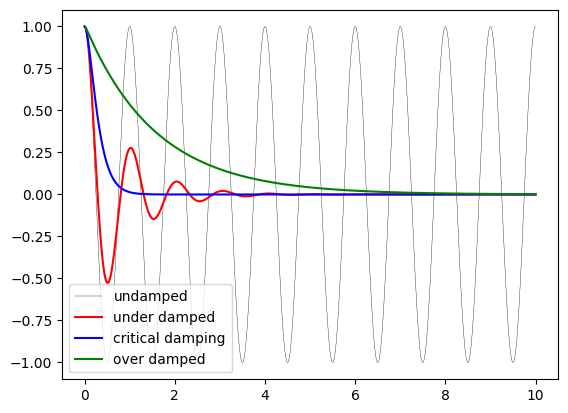

In [ ]:
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]

    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]


y0 = [1.0, 0.0]


t = linspace(0, 10, 1000)
w0 = 2*pi*1.0


y1 = odeint(dy, y0, t, args=(0.0, w0))
y2 = odeint(dy, y0, t, args=(0.2, w0))
y3 = odeint(dy, y0, t, args=(1.0, w0))
y4 = odeint(dy, y0, t, args=(5.0, w0))

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

In [ ]:
from scipy.fftpack import *

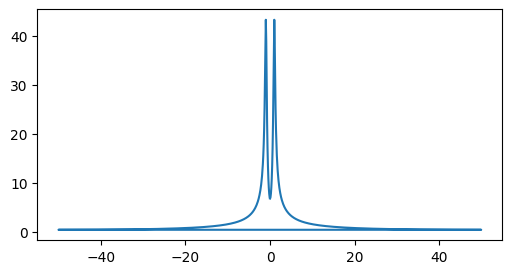

In [ ]:
# Fourier transformation
N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0])

w = fftfreq(N, dt)

fig, ax = subplots(figsize=(6,3))
ax.plot(w, abs(F));

In [ ]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

In [ ]:
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([ 1.7390209 +0.j        , -0.05844832+0.42208933j,
       -0.05844832-0.42208933j])

In [ ]:
# solve a system of linear equations
x = solve(A, b)
x

array([ 3.90352962,  4.71387582, -2.15190625])

In [ ]:
evecs

array([[ 0.63706212+0.j        , -0.14553374-0.54841641j,
        -0.14553374+0.54841641j],
       [ 0.38321707+0.j        , -0.62764541+0.j        ,
        -0.62764541-0.j        ],
       [ 0.66880231+0.j        ,  0.43279285+0.31114459j,
         0.43279285-0.31114459j]])

In [ ]:
svd(A)

(array([[-0.62879761, -0.40269251, -0.66517088],
        [-0.32522501, -0.64082433,  0.69539404],
        [-0.70628766,  0.65359232,  0.27198313]]),
 array([1.78448425, 0.71047818, 0.24905705]),
 array([[-0.44264584, -0.40307433, -0.80099672],
        [-0.71624295,  0.69637377,  0.04538292],
        [ 0.53950042,  0.59379681, -0.5969461 ]]))

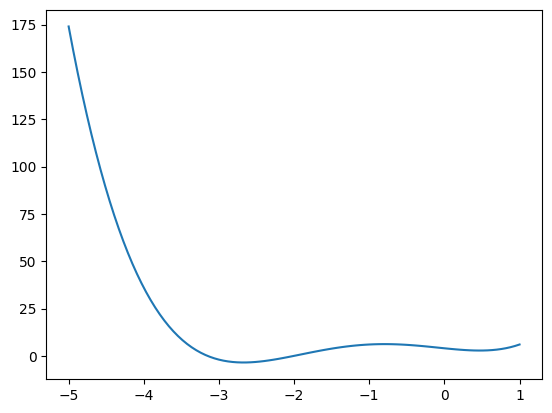

In [ ]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = subplots()
x = linspace(-5, 1, 100)
ax.plot(x, f(x));

In [ ]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


array([0.46961743])

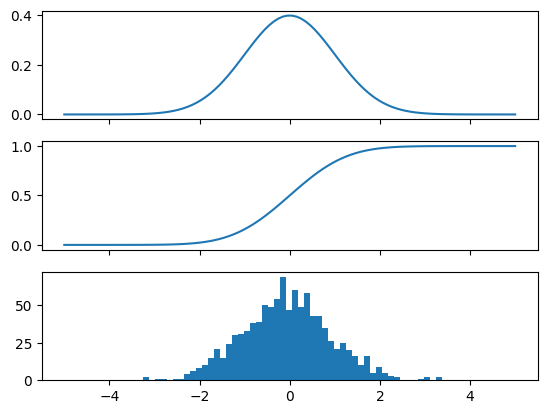

In [ ]:
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

axes[0].plot(x, Y.pdf(x))

axes[1].plot(x, Y.cdf(x));

axes[2].hist(Y.rvs(size=1000), bins=50);

In [ ]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [ ]:
# T-test
t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(0.48285362598247705, 0.6292525709842026)